In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

C:\Users\akeis\AppData\Local\Temp\ipykernel_12760\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
players.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [5]:
# list of variables to be clustered
features = ["overall", "potential","wage_eur","value_eur", "age"]

In [6]:
#drop rows where missing values are present in features variable
players = players.dropna(subset=features)

In [7]:
#data dataframe is to be used for clustering
data = players[features].copy()

In [8]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [ ]:
#1. scale data.
#2.Initialize random centroids
#3. Label each data point
#4. Update centriods
#5. repeat step 3 and 4 until centriods stop changing

In [9]:
data = (data -data.min()) / (data.max()- data.min()) * 9 + 1

In [10]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [39]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [40]:
centriods = random_centroids(data, 5)

In [41]:
centriods

,0,1,2,3,4
overall,4.913043,4.913043,1.978261,4.130435,5.304348
potential,3.934783,5.108696,4.326087,6.673913,5.108696
wage_eur,1.270386,1.038627,4.334764,1.000000,1.450644
value_eur,1.021620,1.014660,1.012341,1.602703,1.138764
age,3.333333,4.000000,3.666667,2.000000,3.333333


In [ ]:
# distance of each player to each player centriod

In [42]:
def get_labels(data, centroids):
    distances = centriods.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1) #index of minimum value in each row

In [43]:
labels = get_labels(data, centriods)

In [44]:
labels

0        4
1        4
2        4
3        4
4        4
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [45]:
# how many players are in each cluster based on random centriods
labels.value_counts()

1    9302
3    4211
4    2961
0    2632
2      59
dtype: int64

In [46]:
#geometric mean of all overall values for players in each cluster (0-5)
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [48]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

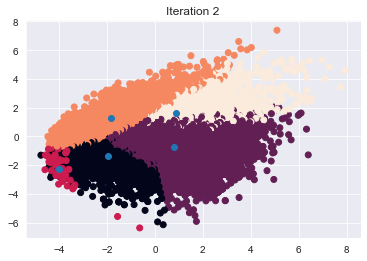

In [49]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [50]:
centroids

,0,1,2,3,4
overall,2.983135,4.983406,1.162743,3.716123,5.936648
potential,3.718826,4.948018,2.656128,6.065143,6.502343
wage_eur,1.024425,1.149620,1.011005,1.086795,1.547079
value_eur,1.014570,1.069404,1.004025,1.084918,1.365413
age,3.410745,5.018794,2.530885,2.138938,3.648261


In [51]:
labels.value_counts()

1    9302
3    4211
4    2961
0    2632
2      59
dtype: int64

In [52]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
8165,Elton Coengo,67,67,6000.0,1200000.0,21
...,...,...,...,...,...,...
19195,H. Singh,48,56,500.0,100000.0,19
19205,Xie Longfei,48,53,2000.0,70000.0,20
19208,Chen Zhengfeng,48,52,2000.0,70000.0,20
19210,Gao Xiang,48,54,800.0,60000.0,20


In [53]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [55]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,4.801395,3.596813,6.226470
potential,4.504272,5.204622,6.620782
wage_eur,1.113039,1.039850,1.654994
value_eur,1.040041,1.035691,1.412551
age,5.609582,2.710514,4.136990
